In [7]:
import numpy as np
import scipy.special as ss
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Set parameters
n = 100
# number of observations
a1 = np.array([3,3]).T #weight
a2 = np.array([3,-3]).T #weight


In [4]:
## Data generation
X = np.array(np.random.randn(n, 2))
Z = np.array(np.random.randn(n))
Y = ss.expit(np.matmul(X, a1)) + np.matmul(X, a2)**2 + 0.3*Z #sigmoid transformation
print(Y[:10])

[   9.0947033    23.06157192    5.80735894  131.67538289   17.32691819
    5.27120505   18.32539217    1.91558368    2.17070764    9.55699645]


Estimation results:
layers: 4
outputs: 1
out activation: identity
iterations: 21715
loss: 0.410355544171
coefficients:
 [array([[-8.02208573,  1.87646597,  0.52713691,  2.29242341, -1.29993218,
         1.81007406, -2.27532075,  8.85414289, -2.60711963,  2.96658079],
       [ 8.79445848, -2.09233361, -0.97397908, -1.49569496,  0.72221553,
        -1.43180077,  2.33889757, -8.55837726,  2.55961885, -3.04733468],
       [ 0.31054995, -0.01615139,  4.29476708, -0.3796856 ,  0.40557194,
         0.06090442,  0.05567405,  0.44364397, -0.04902116, -0.01387806]]), array([[  2.77815989,   5.79426463,   3.89623361,   2.00411561,
          0.91162299,   9.31290798,   5.47426556,   3.85472202,
          2.50784408,   5.94976011],
       [  7.81817366,   8.40277417,   5.73376463,   8.4048027 ,
          8.16528876,   6.15525781,   6.94151385,   5.02530486,
          8.95511605,   9.51368331],
       [ -3.36025499,  -0.50289454,   0.71322055,  -3.05069303,
         -3.45984178,   0.04036975,  -0.15

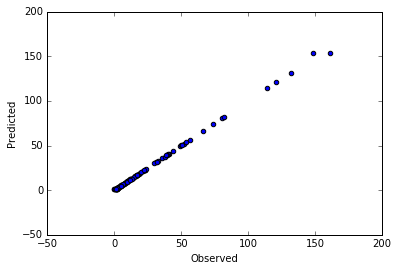

In [24]:
## Fit multi-layer perceptron (MLP) predicts numbers
design = np.column_stack((X, Z))
net = MLPRegressor(hidden_layer_sizes = (10,10), activation = "logistic", max_iter=35000, alpha=1e-4, tol=1e-6)
#alpha regularization parameter
res = net.fit(design, Y)
print ("Estimation results:")
print ("layers:", net.n_layers_)
print ("outputs:", net.n_outputs_)
print ("out activation:", net.out_activation_)
print ("iterations:", net.n_iter_)
print ("loss:", net.loss_)
print ("coefficients:\n", net.coefs_)
print ("intercepts:\n", net.intercepts_)
print ("score:", net.score(design, Y))

plt.scatter(Y, net.predict(design))
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()


score: 0.956984987336


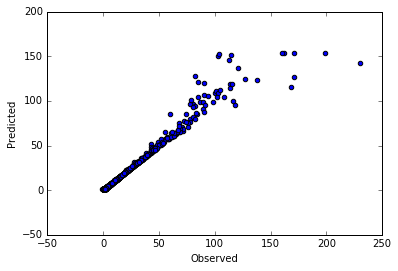

In [25]:
### Now predict on a larger dataset
nt = 1000
Xt = np.array(np.random.randn(nt, 2))
Zt = np.array(np.random.randn(nt))
Yt = ss.expit(np.matmul(Xt, a1)) + np.matmul(Xt, a2)**2 + 0.3*Zt
designt = np.column_stack((Xt, Zt))
hatY = net.predict(designt)
print("score:", net.score(designt, Yt))

plt.scatter(Yt, hatY)
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()